# Исследование продаж компьютерных игр

Данный проект выполнен для интернет магазина «Стримчик», который продаёт по всему миру компьютерные игры.
В проекте проведено исследование продаж игр на основе исторических данных открытых источников. В результате исследования выявлены факторы влияющие на успешность игр, что позволит выделить потенциально популярные игры и спланировать рекламные кампании.

## Содержание:
* [1. Изучение данных из файла](#1.-bullet)
* &nbsp; &nbsp; [1.1 Вывод](#1.1-bullet)
* [2. Предобработка данных](#2.-bullet)
* &nbsp; &nbsp; [2.1 Итоги предобработки](#2.1-bullet)
* [3. Исследовательский анализ данных](#3.-bullet)
* &nbsp; &nbsp; [3.1 Определение актуального периода для анализа](#3.1-bullet)
* &nbsp; &nbsp; &nbsp; &nbsp;[3.1.1 Вывод](#3.1.1-bullet)
* &nbsp; &nbsp; [3.2 Анализ продаж по платформам в актуальном периоде](#3.2-bullet)
* &nbsp; &nbsp; &nbsp; &nbsp;[3.2.1 Вывод](#3.2.1-bullet)
* &nbsp; &nbsp; [3.3. Анализ продаж по платформам на графиках разброса](#3.3-bullet)
* &nbsp; &nbsp; &nbsp; &nbsp;[3.3.1 Вывод](#3.3.1-bullet)
* &nbsp; &nbsp; [3.4 Влияние отзывов пользователей и критиков на продажи игр на разных платформах](#3.4-bullet)
* &nbsp; &nbsp; &nbsp; &nbsp;[3.4.1 Вывод](#3.4.1-bullet)
* &nbsp; &nbsp; [3.5 Влияние жанра игр на продажи](#3.5-bullet)
* &nbsp; &nbsp; &nbsp; &nbsp;[3.5.1 Вывод](#3.5.1-bullet)
* [4. Анализ продаж игр по регионам](#4.-bullet)
* &nbsp; &nbsp; [4.1 Вывод](#4.1-bullet)
* [5. Проверка гипотез](#5.-bullet)
* &nbsp; &nbsp; [5.1 Результат проверки гипотез](#5.1-bullet)
* [6. Общий вывод](#6.-bullet)

<a class="anchor" id="1.-bullet"></a>
##  Изучение данных

In [20]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('d:\\documents\\ds\\games\\games.csv')
# df = pd.read_csv('/datasets/games.csv')
display(df.head())
df.info()
print('\n', 'Количество пропусков:', df.isna().sum(), sep='\n')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Количество пропусков:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
U

### Вывод

Полученный датасет содержит 16715 строк и 11 столбцов.  
Название столбцов содержат символы в верхнем регистре.  
Обнаружены пропущенные значения в столбцах 'Name', 'Critic_Score', 'User_Score', 'Rating'.

## Предобработка данных

In [22]:
# Приводим названия столлбцов к нижнему регистру
df.columns = [x.lower() for x in list(df)]

# Удаление строк с пропущенными значениями в столбце 'name'
display(df[df['name'].isna()])
df.dropna(subset=['name'], inplace=True)

# Удаление пропущенных значений столбца 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

# Замена типа данных столбца 'year_of_release'
df['year_of_release'] = df['year_of_release'].astype(int)

# Замена значения 'tbd' в столбце 'user_score' на пропуск
df['user_score'].replace('tbd', np.nan, inplace=True)

# Замена типа данных столбца 'user_score'
df['user_score'] = pd.to_numeric(df['user_score'])

df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<a class="anchor" id="2.1-bullet"></a>
###  Итоги предобработки

Название столбцов приведены к нижнему регистру.  
Удалены две строки с пропущенными значениями большинства параметров.  
Значение 'tbd' в столбце 'user_score' заменен на пропуск  
Заменен тип данных в столбцах 'year_of_release', 'user_score'.  
Заполнение пропусков в столбцах 'critic_score', 'user_score', 'rating' на основании зависимости этих значений от других столбцов нецелесообразно, так как цель нашей работы найти эти зависимости.  
Было удалено 271 строк с пропусками, что составляет 1,6% от датасета.

## Исследовательский анализ данных

In [23]:
# Расчет столбца с суммарными продажами во всех регионах
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


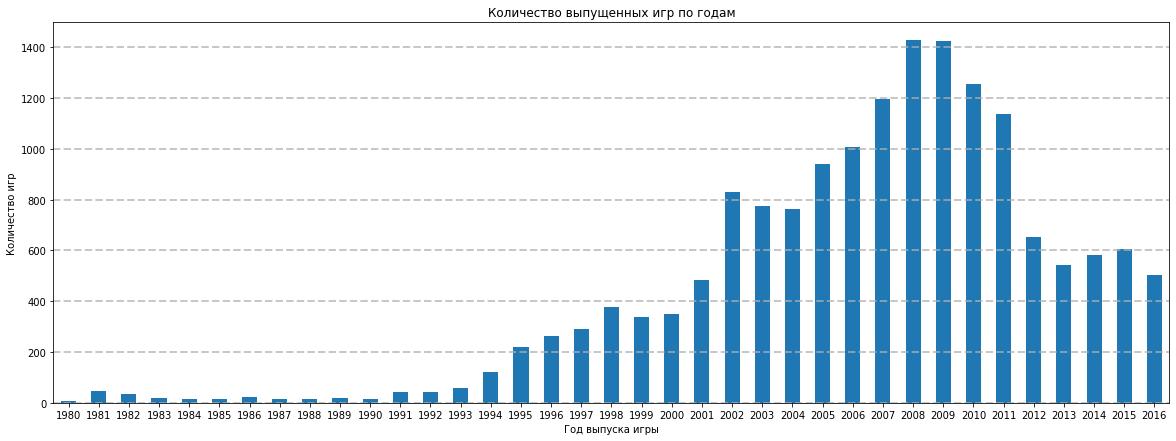

In [24]:
# Количество выпущенных игр по годам
plt.figure(figsize=(20, 7))
df.groupby('year_of_release')['year_of_release'].count().plot(x='year_of_release',
                                                              y='count', kind='bar', rot=0, fontsize=10)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

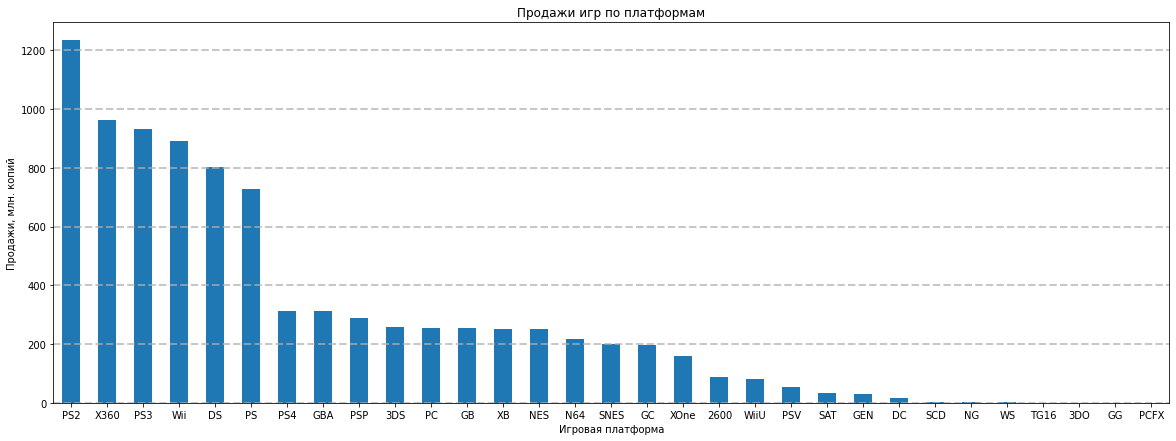

In [25]:
# Продажи по платформам
plt.figure(figsize=(20, 7))
df.groupby('platform')['sales'].sum().sort_values(ascending=False).plot(x='platform',
                                            y='sum', kind='bar', rot=0, fontsize=10)
plt.title('Продажи игр по платформам')
plt.xlabel('Игровая платформа')
plt.ylabel('Продажи, млн. копий')
plt.grid(linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [26]:
# Выбор 18 платформ с наибольшими продажами
plat_top = df.groupby('platform')['sales'].sum().sort_values(ascending=False).head(18).index.values.tolist()
print('18 платформ с наибольшими продажами:', '\n', plat_top)

18 платформ с наибольшими продажами: 
 ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne']


In [27]:
# Cводная таблица продаж по платформам и годам
platf_df = df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

# Cводная таблица продаж по  18 платформам c наибольшими продажами
df_18 = platf_df[plat_top]

<a class="anchor" id="3.1-bullet"></a>
## Определение актуального периода для анализа

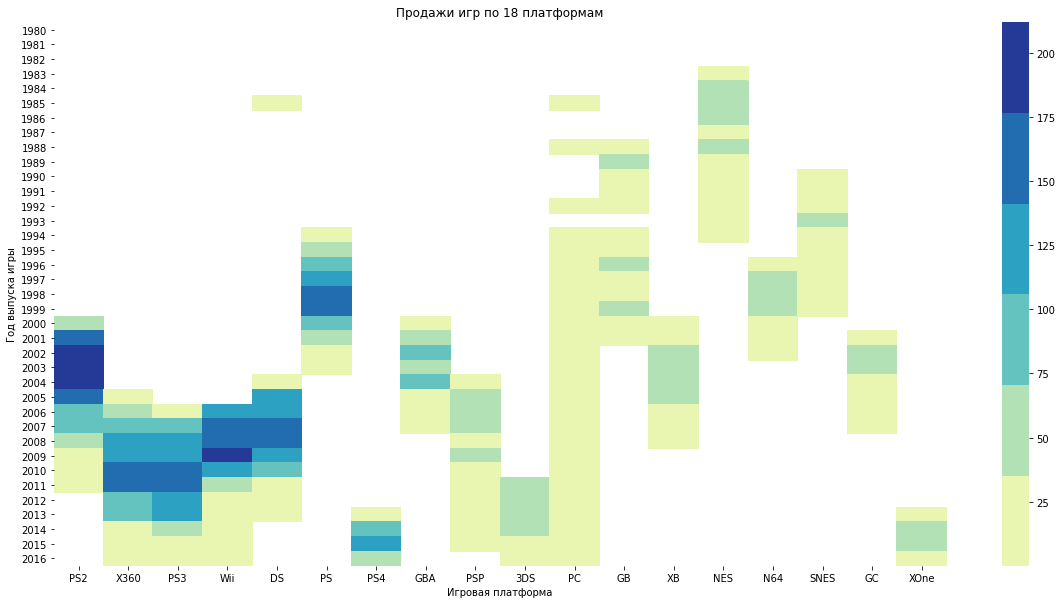

In [28]:
# Тепловая карта показывающая продажи по 18 платформам
plt.figure(figsize=(20, 10))
colormap = sns.color_palette("YlGnBu")
sns.heatmap(df_18, cmap=colormap)
plt.title('Продажи игр по 18 платформам')
plt.xlabel('Игровая платформа')
plt.ylabel('Год выпуска игры')
plt.show()

<a class="anchor" id="3.1.1-bullet"></a>
### Вывод
На тепловой карте видно, что время "жизненого цикла" платформы составляет 10 лет.  
Игровые платформы PS4 и XOne показывают рост продаж с 2013 г. На остальных платформах игры или уже не продаются или демострируют падение продаж (находятся в конце жжизненнного цикла"). 
Для прогноза продаж на 2017 г. актуальный период анализа данных - 2013 - 20016 г.

<a class="anchor" id="3.2-bullet"></a>
## Анализ продаж по платформам в актуальном периоде

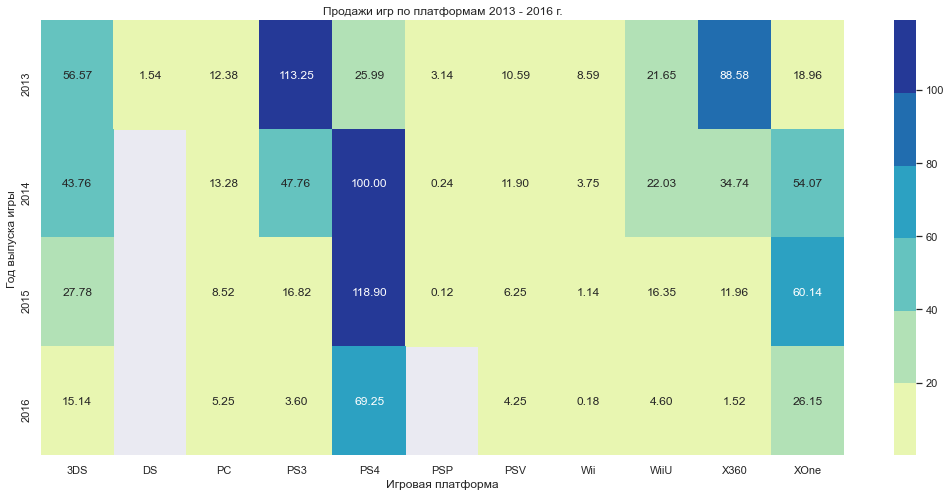

In [29]:
# Таблица продаж с 2013 г
df_2013 = df.query('year_of_release > 2012').copy()

# Cводная таблица продаж по платформамм  с 2013 г.
pvt_df = df_2013.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')

# Тепловая карта показвающая продажи по платформам с 2013 г.
plt.figure(figsize=(18, 8))
sns.set(font_scale=1)
colormap = sns.color_palette("YlGnBu")
sns.heatmap(pvt_df, cmap=colormap, annot=True, fmt='.2f')

plt.title('Продажи игр по платформам 2013 - 2016 г.')
plt.xlabel('Игровая платформа')
plt.ylabel('Год выпуска игры')
plt.show()

In [30]:
# Список потенциально прибыльных платформ
list_platf = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

### Вывод
По тепловой карте виден рост продаж у платформ "PS4",  "XOne".   
Падение продаж на платформах "3DS", "PS3", "PSV", "Wiii", "WiU", "X360".  
Платформа "PC" отличается от всех остальных платформ тем, что продажи по всему периоду анализа примерно на одном уровне.  
Остальные платформы из-за низких продаж можно не рассматривать.

## Анализ продаж по платформам на графиках разброса

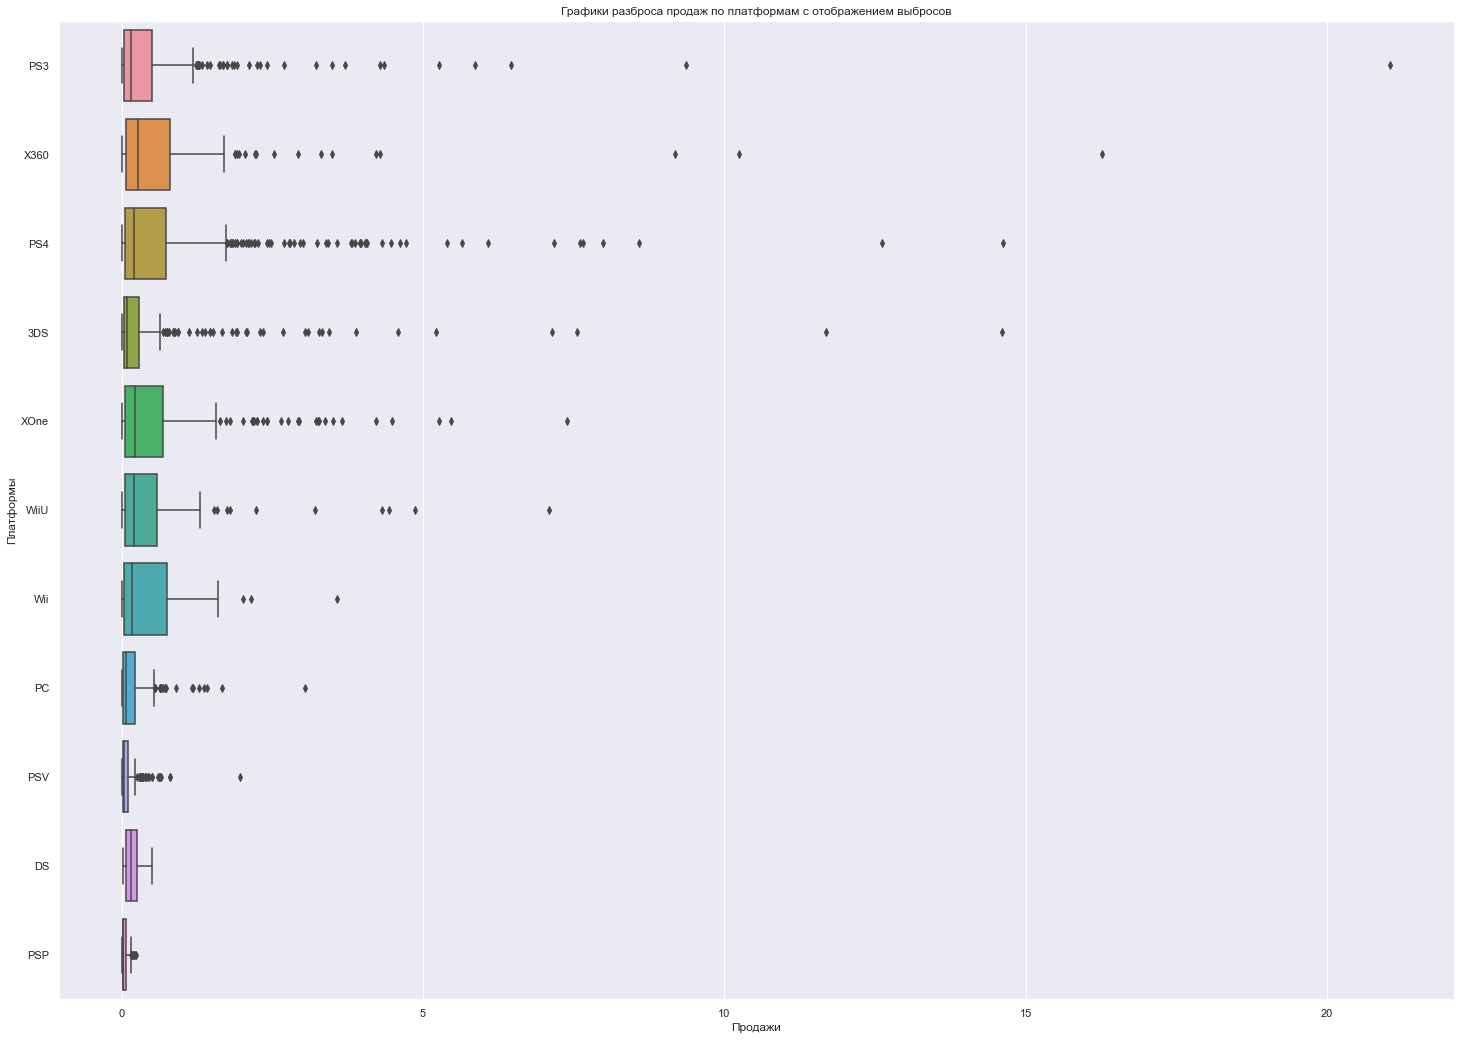

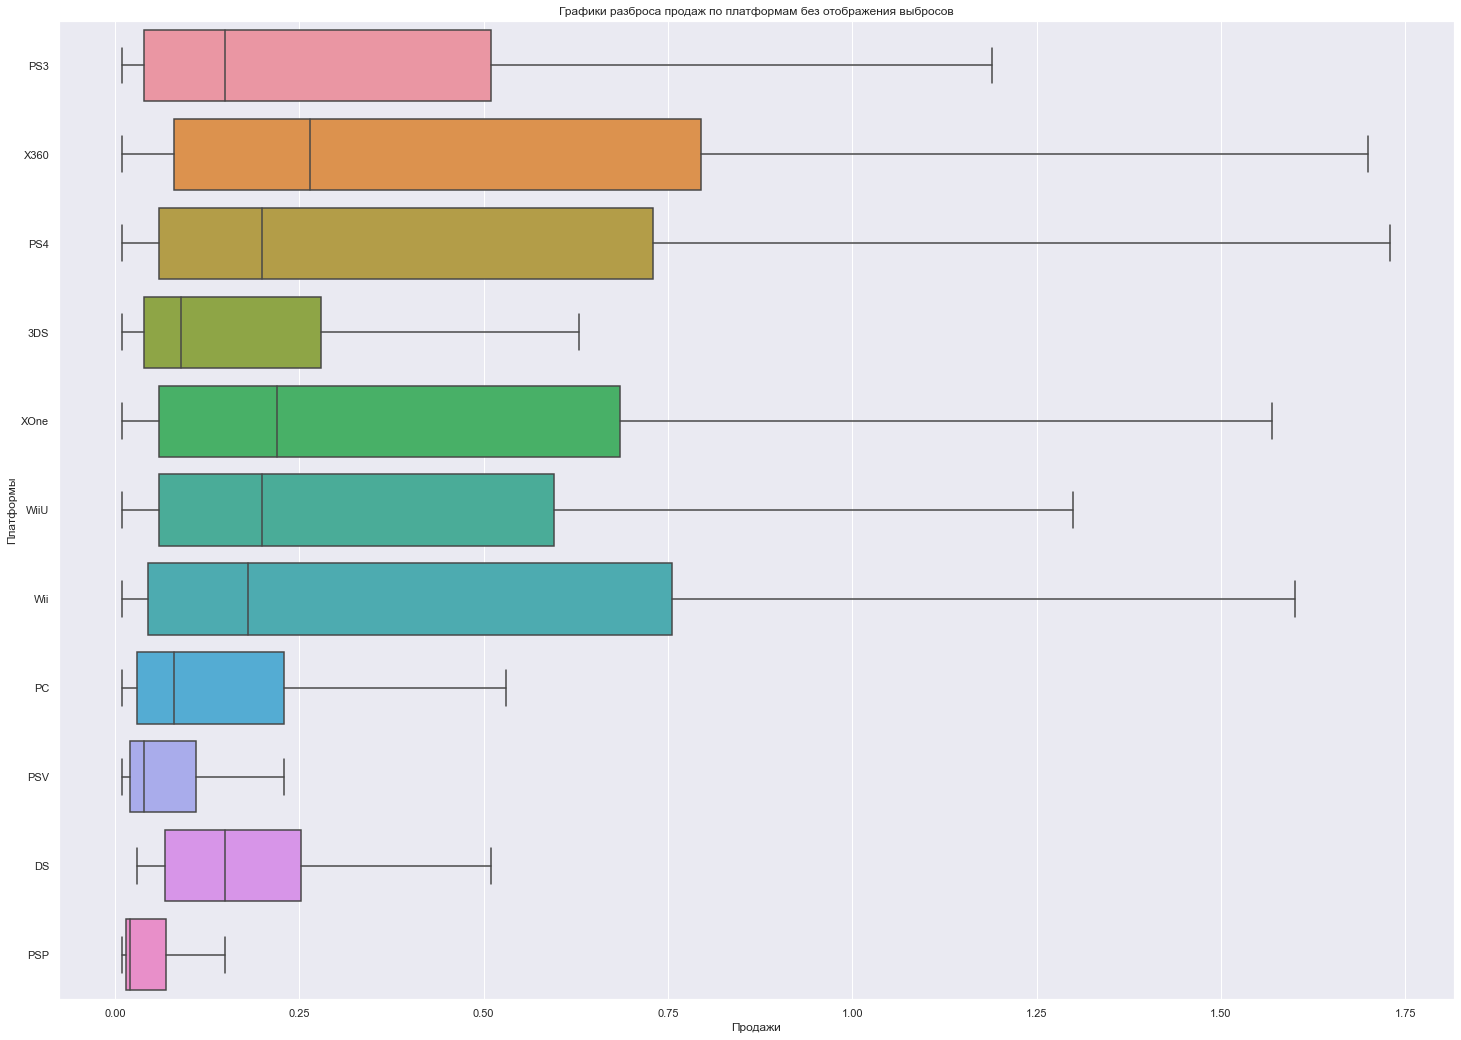

In [31]:
# Графики разброса продаж по платформам с отображением выбросов
sns.set(style="darkgrid")
plt.figure(figsize=(25, 18))
sns.boxplot(x=df_2013["sales"], y=df_2013["platform"])
plt.title('Графики разброса продаж по платформам с отображением выбросов')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.show()
print()

# # Графики разброса продаж по платформам без отображения выбросов
plt.figure(figsize=(25, 18))
sns.boxplot(x=df_2013["sales"], y=df_2013["platform"], showfliers=False)
plt.title('Графики разброса продаж по платформам без отображения выбросов')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.show()

### Вывод
На графиках разброса видно что у платформ Wii, DS, X360, PS3, PS4, 3DS есть небольшое количество игр с очень высокими продажами.

## Влияние отзывов пользователей и критиков на продажи игр на разных платформах

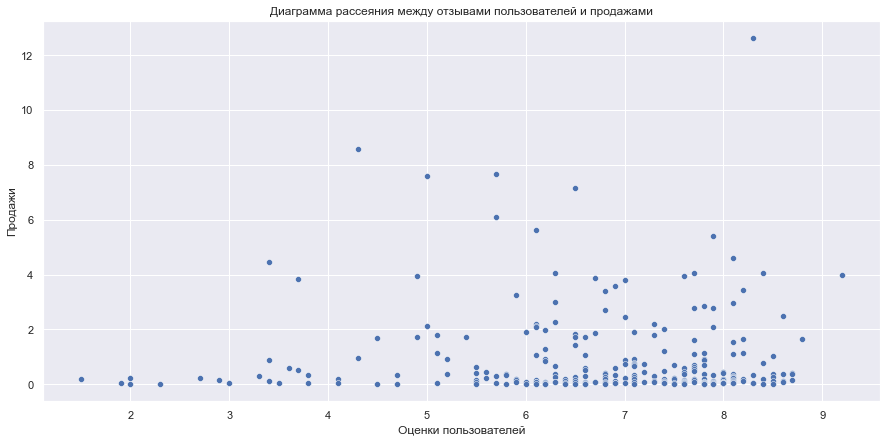

Коэффициент кореляции: -0.03195711020455643


In [33]:
# Диаграмма рассеяния между оценками пользователей и продажами
df_PS4 = df_2013.query('platform == "PS4"')
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_PS4, x="user_score", y="sales")
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи')
plt.show()

# Коэффициент кореляции между отзывами пользователей и продажами
print('Коэффициент кореляции:', df_PS4['user_score'].corr(df_PS4['sales']))

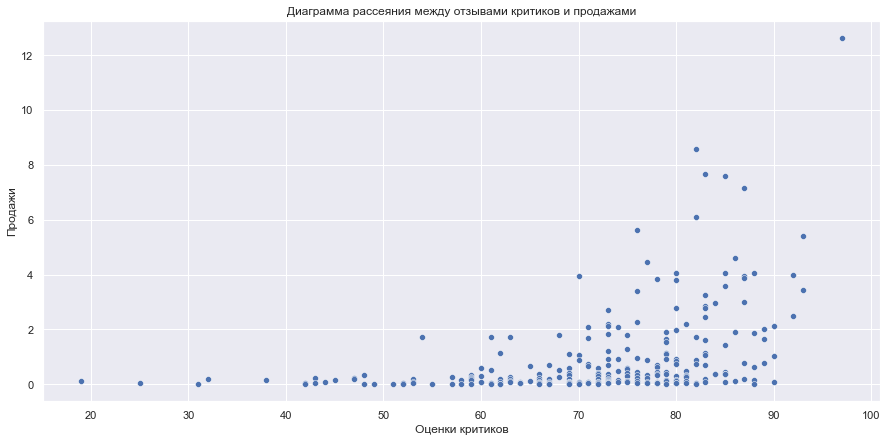

Коэффициент кореляции: 0.4065679020617816


In [34]:
# Диаграмма рассеяния между отзывами критиков и продажами
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_PS4, x="critic_score", y="sales")
plt.title('Диаграмма рассеяния между отзывами критиков и продажами')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи')
plt.show()

# Коэффициент кореляции между отзывами критиков и продажами
print('Коэффициент кореляции:', df_PS4['critic_score'].corr(df_PS4['sales']))

In [35]:
for i in list_platf:
    temp_user = df_2013.query('platform == @i')
    cor_user = temp_user['user_score'].corr(temp_user['sales'])
    cor_crit = temp_user['critic_score'].corr(temp_user['sales'])
    if not np.isnan(cor_user) and not np.isnan(cor_crit):
        print(i,'Корреляция оценки пользователей/продажи', cor_user.round(2))
        print(i,'Корреляция оценки критиков/продажи', cor_crit.round(2), '\n')

3DS Корреляция оценки пользователей/продажи 0.24
3DS Корреляция оценки критиков/продажи 0.36 

PC Корреляция оценки пользователей/продажи -0.09
PC Корреляция оценки критиков/продажи 0.2 

PS3 Корреляция оценки пользователей/продажи 0.0
PS3 Корреляция оценки критиков/продажи 0.33 

PS4 Корреляция оценки пользователей/продажи -0.03
PS4 Корреляция оценки критиков/продажи 0.41 

PSV Корреляция оценки пользователей/продажи 0.0
PSV Корреляция оценки критиков/продажи 0.25 

WiiU Корреляция оценки пользователей/продажи 0.42
WiiU Корреляция оценки критиков/продажи 0.38 

X360 Корреляция оценки пользователей/продажи -0.01
X360 Корреляция оценки критиков/продажи 0.35 

XOne Корреляция оценки пользователей/продажи -0.07
XOne Корреляция оценки критиков/продажи 0.42 



<a class="anchor" id="3.4.1-bullet"></a>
### Вывод
Продажа игр на платформе "PS4" не коррелирует с отзывов пользователей и критиков.  
Продажи игр на остальных платформах также не коррелируют с отзывами пользователей и критиков.

## Влияние жанра игр на продажи

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: sales, dtype: float64


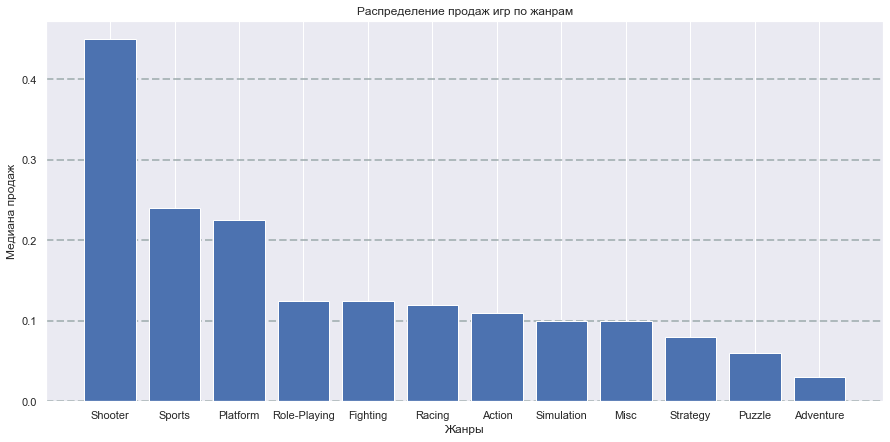

In [15]:
# Распределение продаж игр по жанрам
print(df_2013.groupby('genre')['sales'].median().sort_values(ascending=False))

# График распределение продаж игр по жанрам
plt.figure(figsize=(15, 7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(df_2013.groupby('genre')['sales'].median().sort_values(ascending=False).index,
        df_2013.groupby('genre')['sales'].median().sort_values(ascending=False))
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Медиана продаж')
plt.show()


### Вывод
Лидеры продаж - игры жанра "Action".  
Высокие продажи у игр жанра "Sports", "Shooter", "Platform".  
Самые низкие продажи у игр жанров "Puzzle", "Adventure".

## Анализ продаж игр по регионам

na_sales


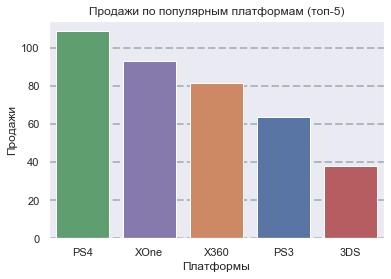

eu_sales


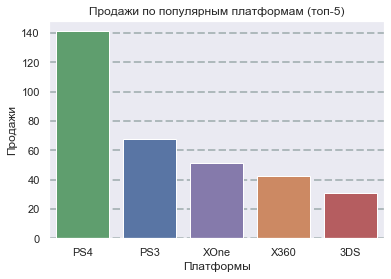

jp_sales


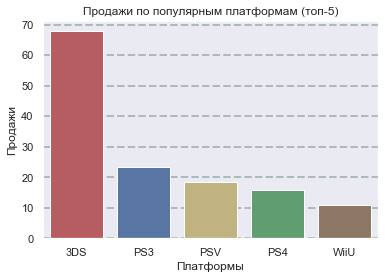

other_sales


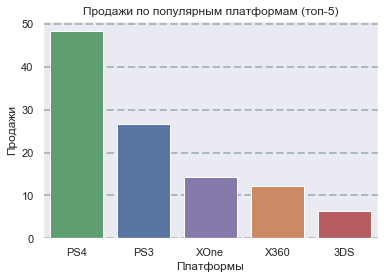

In [16]:
# Популярные платформы (топ-5) по регионам

sns.set_style('darkgrid')
color_bar = dict(zip(df_2013['platform'].unique(), sns.color_palette())) 
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(i)
    sns.barplot(
        x=df_2013.groupby('platform')[i].sum().sort_values(ascending=False).head(5).index,
        y=df_2013.groupby('platform')[i].sum().sort_values(ascending=False).head(5), palette=color_bar)
    plt.title('Продажи по популярным платформам (топ-5)')
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()


na_sales


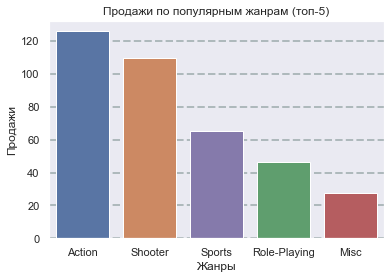

eu_sales


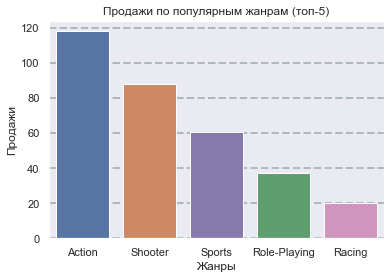

jp_sales


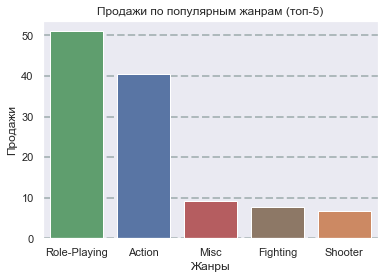

other_sales


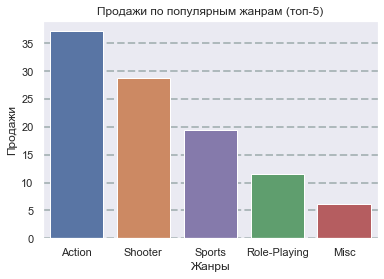

In [17]:
# Самые популярные жанры (топ-5) по регионам

sns.set_style('darkgrid')
color_bar = dict(zip(df_2013['genre'].unique(), sns.color_palette())) 
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(i)
    sns.barplot(
        x=df_2013.groupby('genre')[i].sum().sort_values(ascending=False).head(5).index,
        y=df_2013.groupby('genre')[i].sum().sort_values(ascending=False).head(5), palette=color_bar)
    plt.title('Продажи по популярным жанрам (топ-5)')
    plt.xlabel('Жанры')
    plt.ylabel('Продажи')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()

na_sales


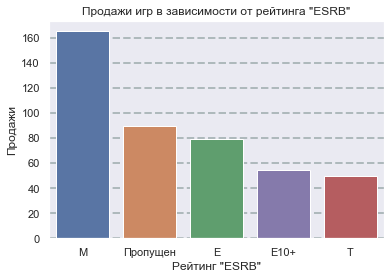

eu_sales


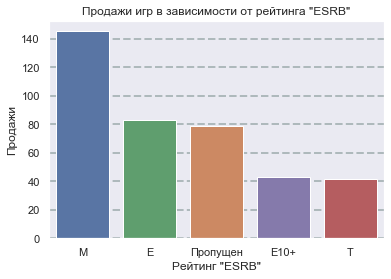

jp_sales


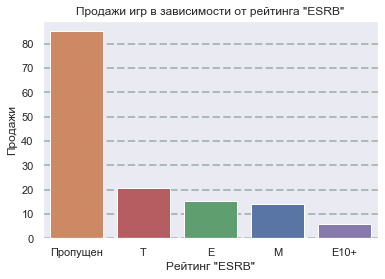

other_sales


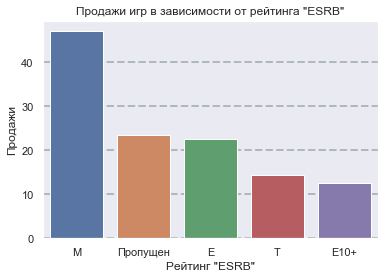

In [18]:
# Диаграмма продаж игр в зависимости от рейтинга ESRB по регионам
# 'EC' - для детей от 3 лет, 'E' - для всех старше 6 лет, 'E10+' - для всех старше 10 лет,
# 'T' - для подростков 13—19 лет, 'M' - от 17 лет, 'RP' - рейтинг ожидается

df_2013['rating'].fillna('Пропущен', inplace=True)
sns.set_style('darkgrid')
color_bar = dict(zip(df_2013['rating'].unique(), sns.color_palette())) 
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    print(i)
    sns.barplot(
        x=df_2013.groupby('rating')[i].sum().sort_values(ascending=False).head(5).index,
        y=df_2013.groupby('rating')[i].sum().sort_values(ascending=False).head(5), palette=color_bar)
    plt.title('Продажи игр в зависимости от рейтинга "ESRB"')
    plt.xlabel('Рейтинг "ESRB"')
    plt.ylabel('Продажи')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()  
    

### Вывод
Самые популярные платформа в в Японии «3DS», в Северной Америке, в Европе, и в остальных странах «PS4».  
Во всех странах кроме Японии самые популярные жанры «Action», «Shooter», «Sports». В Японии популяры «Role-Playing»,«Action».  
По рейтингу ESRB наиболее продаваемые игры во всех странах исключая Японию категории «М» - от 17 лет. По Японии выводы по рейтингу игр сделать невозможно так как очень много пропущенных данных.

## Проверка гипотез

 Гипотеза - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [36]:
# Получение датафрейма без пропущенных значений в 'user_score'
# Полученный датафрейм можно рассматривать как выборку из датафрейма df_2013
df_user = df_2013.dropna(subset=['user_score'])

# Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются
alpha = .05
results = st.ttest_ind(df_user.query('platform == "PC"')['user_score'],
                       df_user.query('platform == "XOne"')['user_score'])
print(f'p-значение:{results.pvalue: .3}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14
Не получилось отвергнуть нулевую гипотезу


Гипотеза - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковы.  
Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются

In [37]:
# Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковы 
# Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются
alpha = .05
results = st.ttest_ind(df_user.query('genre == "Action"')['user_score'],
                       df_user.query('genre == "Sports"')['user_score'])
print(f'p-значение:{results.pvalue: .3}')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.05e-27
Отвергаем нулевую гипотезу


<a class="anchor" id="5.1-bullet"></a>
### Результат проверки гипотез
Гипотеза, что пользовательские рейтинги платформ Xbox One и PC одинаковые не отвергается с уровнем критической значимости равной 5%. 

Гипотеза, что средние пользовательские рейтинги жанров Action  и Sports различаются, подтверждается с уровнем критической значимости равной 5%. 

## Общий вывод

В проекте проведено исследование для планирования работы интернет-магазина по продажам компьютерных игр на 2017 г. Цель исследования выявить факторы, влияющие на продажи игр.
Из предоставленного файла с датасетом был создан датафрейм. При анализе информации содержащейся в датафрейме были обнаружены пропуски, заглавные буквы в названии столбцов. Была проведена работа по исправлению некорректных данных. Часть строк с пропусками была удалена. Столбцы с числами были преобразованы в числовой тип данных.
Для построения прогнозов на 2017 г. был выбран период с 2013 по 2016 г.
Потенциально прибыльные платформы: "PS4", "PC", "3DS", "PS3", "PSV", "Wiii", "WiU", "X360", "XOne". Особенно выделяются платформы "PS4" и «XOne» так как они находятся в середине «жизненного цикла» платформ, продажи игр на этих платформах растут. Игры этих платформ имеют высокий потенциал продаж. Следует обратить внимание на платформу «PC». Не смотря на небольшие суммы продаж, продажи стабильны. Кроме того на данной платформе проводятся большое количество киберспортивных турниров, что можно использовать для рекламы магазина.  
При анализе влияния отзывов пользователей и критиков на продажи игры корреляции не выявлено.   
В разных регионах на продажи игр по-разному влияют платформа, жанр и рейтинг ESRB.
В Северной Америке, в Европе и других регионах популярна платформа "PS4", в Японии "3DS". 
В Японии популярны игры жанра "Role-Playing" в остальных регионах популярны жанры «Action», «Shooter», «Sports».
Во всех регионах кроме Японии самые популярные игры рейтинга ESRB "М", вторая по полярности категория "Е".  
При проверке гипотезы, что пользовательские рейтинги платформ "Xbox One" и "PC" одинаковые, гипотеза опровергнута не была. При проверке гипотезы, что средние пользовательские рейтинги жанров "Action" и "Sports" различаются, гипотеза подтвердилась.  
При планировании рекламной компании магазина на 2017 г. нужно учесть следующее:  
Самый большой рост продаж игр будет на платформах "PS4", "XOne".  
Самые продаваемыми будут игры жанров «Action», «Shooter», «Sports», «Role-Playing».  Рынок игр в Японии значительно отличается от рынка игр остальных стран, поэтому рекламная компания в Японии будет отличаться от других стран.  
У половины пользователей игр возраст больше 16 лет, что следут учесть при планированни рекламной компании.